# Proyek Machine Learning: Estimasi Harga Mobil Bekas
### Disusun oleh: Adinda Chandra Ayu Kusumawardhana  
### Fokus Proyek: Prediksi Harga dalam Industri Otomotif

![ilustrasi-penjualan-mobil.jpg](https://akcdn.detik.net.id/visual/2024/07/22/seorang-pengunjung-melihat-mobil-mobil-bekas-yang-dijual-di-mangga-dua-square-pada-senin-2272024-3_169.jpeg?w=900&q=80)

### Pendahuluan
Harga kendaraan bekas dipengaruhi oleh berbagai faktor seperti **merek mobil**, **tahun perakitan**, **jenis transmisi dan bahan bakar**, **jarak tempuh**, hingga **kondisi fisik** kendaraan. Dalam konteks jual-beli mobil, mendapatkan estimasi harga yang tepat sangat penting bagi kedua belah pihak.

Dengan kemajuan teknologi dan ketersediaan data yang melimpah, kini memungkinkan untuk membangun sistem estimasi harga menggunakan metode *machine learning*. Sistem seperti ini memiliki potensi untuk:

- Membantu penjual menentukan harga jual yang sesuai pasar
- Memberikan referensi harga yang obyektif bagi calon pembeli
- Mengotomatiskan penilaian harga pada platform e-commerce kendaraan

Melalui proyek ini, akan dikembangkan model prediktif berbasis data yang mampu memberikan estimasi harga mobil dengan tingkat akurasi tinggi serta dapat diandalkan dalam skenario nyata.



## 1. IMPORT LIBRARY

In [ ]:
# Import library
import pandas as pd # Untuk manipulasi data (membaca CSV, dataframe)
import numpy as np # Untuk operasi numerik (array, matematika, dll)
import matplotlib.pyplot as plt # Untuk membuat grafik (visualisasi)
import seaborn as sns # Untuk visualisasi data statistik (heatmap, scatterplot, dll)

# scikit-learn - Data Splitting, Scaling, Preprocessing, Modeling, dan Evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV # Corrected submodule name
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# scikit-learn & XGBoost - Algoritma Model
from sklearn.linear_model import LinearRegression # Corrected submodule name
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Warnings Handling (Untuk menyembunyikan peringatan yang tidak penting)
import warnings
warnings.filterwarnings('ignore')

## 2. DATA UNDERSTANDING
Data Understanding atau pemahaman data merupakan tahap untuk mengerti isi dari data yang dimiliki serta menilai sejauh mana kualitas data tersebut dapat mendukung proses analisis

Sumber data : https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

Dataset yang digunakan merupakan data kendaraan dengan fitur-fitur terkait spesifikasi dan kondisi mobil.

Dataset memiliki kolom sebagai berikut:

| Fitur                | Deskripsi                                                      |
| -------------------- | -------------------------------------------------------------- |
| `ID`                 | ID unik mobil                                                  |
| `Price`              | Harga mobil dalam satuan tertentu (target/label)               |
| `Levy`               | Pajak kendaraan                                                |
| `Manufacturer`       | Merek mobil                                                    |
| `Model`              | Model mobil                                                    |
| `Prod. year`         | Tahun produksi                                                 |
| `Category`           | Jenis kendaraan (SUV, Sedan, dll.)                             |
| `Leather interior`   | Apakah memiliki interior kulit (Yes/No)                        |
| `Fuel type`          | Jenis bahan bakar (Petrol, Diesel, Hybrid, dll.)               |
| `Engine volume`      | Kapasitas mesin (L)                                            |
| `Mileage`            | Jarak tempuh kendaraan (kilometer)                             |
| `Cylinders`          | Jumlah silinder mesin                                          |
| `Gear box type`      | Jenis transmisi (Manual/Automatic)                             |
| `Drive wheels`       | Tipe penggerak roda (FWD, RWD, AWD)                            |
| `Doors`              | Jumlah pintu                                                   |
| `Wheel`              | Setir kiri/kanan                                               |
| `Color`              | Warna mobil                                                    |
| `Airbags`            | Jumlah airbag                                                  |

### Eksdplorasi Awal terhadap Dataset

* Beberapa kolom seperti *Manufacturer*, *Model*, *Category*, *Leather interior*, *Fuel type*, *Gear box type*, *Drive wheels*, *Doors*, *Wheel*, dan *Color* termasuk dalam tipe kategorikal. Oleh karena itu, diperlukan proses encoding agar fitur-fitur ini dapat diproses oleh model machine learning.

* Fitur numerik seperti *Price*, *Production Year*, *Cylinders*, dan *Airbags* memiliki skala yang bervariasi, sehingga perlu dilakukan teknik normalisasi atau standarisasi agar model dapat belajar secara optimal.

* Kolom *Levy* bertipe objek dan mengandung nilai kosong atau tanda baca seperti "-" yang harus dibersihkan dan dikonversi menjadi nilai numerik.

* Pada kolom *Engine volume*, terdapat gabungan angka dan teks (contohnya '2.0 Turbo') yang perlu dipisah agar volume mesin dapat diolah secara numerik dan fitur tambahan seperti jenis turbo dapat diolah secara kategorikal.

* Nilai pada fitur *Mileage* masih mengandung satuan seperti “km”, sehingga perlu dilakukan pembersihan agar nilainya dapat dikonversi ke format angka.

* Data pada kolom *Doors* tidak konsisten, dengan beberapa nilai yang tidak sesuai format standar, seperti '04-May', sehingga diperlukan pembersihan agar hanya menyisakan angka jumlah pintu.

* Distribusi nilai pada *Price* menunjukkan ketidaksimetrian (skewed), sehingga transformasi log (logarithmic transformation) bisa diterapkan untuk menormalkan distribusi dan mengurangi pengaruh outlier.


## 2.1 LOAD DATASET

In [ ]:
from google.colab import files

# Unggah file kaggle.json
uploaded = files.upload()

Saving car_price_prediction.csv to car_price_prediction.csv


In [ ]:
# Download dari Kaggle
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d deepcontractor/car-price-prediction-challenge
!unzip -o car-price-prediction-challenge.zip -d data

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open car-price-prediction-challenge.zip, car-price-prediction-challenge.zip.zip or car-price-prediction-challenge.zip.ZIP.


In [ ]:
# Load dataset
data_mobil = pd.read_csv("/content/car_price_prediction.csv")

In [ ]:
# check Missing value
data_mobil.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


Tidak ada missing value

In [ ]:
# Check Duplication
data_mobil.duplicated().sum()

np.int64(313)

Terdapat data yang terduplikasi sebanyak 313

In [ ]:
data_mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Semua kolom memiliki jumlah data yang sesuai yaitu 19237 dan bertipe object, integer, dan float

In [ ]:
# Check the number of unique values of each column
data_mobil.nunique()

,0
ID,18924
Price,2315
Levy,559
Manufacturer,65
Model,1590
Prod. year,54
Category,11
Leather interior,2
Fuel type,7
Engine volume,107


Fungsi `df.nunique()` memberikan informasi mengenai jumlah nilai unik pada setiap kolom dalam DataFrame. Sebagai contoh, kolom ID memiliki 18.924 nilai berbeda, yang mengindikasikan bahwa setiap baris merupakan entri yang unik. Kolom Price mencatat 2.315 nilai unik, menunjukkan bahwa harga kendaraan cukup beragam. Kolom Manufacturer dan Model masing-masing memiliki 65 dan 1.590 variasi, mencerminkan keberagaman merek dan model mobil. Beberapa kolom seperti Leather interior dan Wheel hanya memiliki 2 nilai berbeda, seperti ya/tidak atau kiri/kanan. Sedangkan kolom Fuel type dan Color memiliki 7 dan 16 nilai unik, memperlihatkan tingkat variasi kategori yang sedang. Informasi ini berguna untuk menilai seberapa beragam data pada tiap fitur sebelum melanjutkan ke tahap analisis lebih mendalam.


In [ ]:
data_mobil.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


Hasil dari `df.describe()` menampilkan ringkasan statistik untuk kolom-kolom numerik dalam DataFrame. Sebagai ilustrasi, kolom *Price* memiliki rata-rata sekitar 18.556, median 13.172, dan nilai maksimum mencapai 26 juta, yang mengindikasikan kemungkinan adanya outlier. Tahun produksi (*Prod. year*) rata-rata berada di angka 2010, dengan rentang antara 1939 hingga 2020. Nilai paling umum pada kolom *Cylinders* adalah 4, sementara nilai tertingginya mencapai 16. Untuk kolom *Airbags*, nilai bervariasi dari 0 hingga 16, dengan rata-rata sekitar 6. Ringkasan ini memberikan gambaran tentang distribusi data, pola umum, serta potensi kejanggalan dalam dataset.


### 📈 **Temuan Statistik Utama**

#### 🚘 Keberagaman Kendaraan

Data menunjukkan keberagaman tinggi dengan mencakup **65 merk mobil** dan **lebih dari 1.500 varian model**. Karakteristik seperti **jenis kendaraan**, **sistem transmisi**, dan **tipe penggerak roda** menunjukkan distribusi yang cukup bervariasi. Beberapa tipe yang dominan antara lain *Hatchback*, *Jeep*, dan *Sedan*.

#### 💵 Rentang Harga

* **Harga Terendah**: \$1
* **Harga Tertinggi**: \$26.307.500
* **Harga Rerata**: Sekitar **\$18.555**

Distribusi harga memperlihatkan ketidakseimbangan (skewness), di mana terdapat sebagian kecil mobil dengan harga sangat mahal yang menggeser nilai rata-rata ke atas.

#### 🔧 Spesifikasi Mesin

Fitur `Engine volume` mencerminkan lebih dari **100 kombinasi volume mesin**, beberapa disertai dengan label seperti *Turbo*.  
Jumlah `Cylinders` (silinder) bervariasi dari **1 hingga 16**, dengan konfigurasi paling umum adalah **4 silinder**.

#### 📊 Analisis Distribusi & Nilai Ekstrem

* Kolom `Mileage` (jarak tempuh) memiliki nilai mulai dari **0 km** hingga ratusan ribu kilometer, menunjukkan variasi besar dalam pemakaian kendaraan.
* Atribut `Levy` mengandung banyak entri kosong atau simbol `'-'` yang perlu ditangani terlebih dahulu sebelum digunakan dalam model.
* Nilai `Airbags` berkisar antara **0 sampai 16 unit**, dengan rata-rata mobil memiliki sekitar **6 kantong udara**.
* Ditemukan sejumlah nilai ekstrim (outliers) pada fitur seperti `Price`, `Mileage`, dan `Engine volume` yang berpotensi mempengaruhi hasil analisis jika tidak ditangani dengan tepat.


In [ ]:
categorical_columns = [
    'Levy',
    'Manufacturer',
    'Model',
    'Category',
    'Leather interior',
    'Fuel type',
    'Gear box type',
    'Drive wheels',
    'Doors',
    'Wheel',
    'Color',
    'Engine volume',
    'Mileage'
]

for col in categorical_columns:
    print(f"Category in {col} is : {df[col].unique()}\n")


Category in Manufacturer is : ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
Category in Model is : ['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']
Category in Category is : ['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']
Category in Leather interior is : ['Yes' 'No']
Category in Fuel type is : ['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-i

Kode ini menghasilkan daftar semua nilai unik dalam kolom-kolom bertipe kategorikal. Misalnya, kolom *Levy* menyimpan informasi pajak kendaraan yang awalnya berbentuk string dan sudah dibersihkan. Kolom *Manufacturer* mencantumkan berbagai merek mobil seperti 'TOYOTA', 'BMW', 'LEXUS', hingga 'FERRARI'. Pada kolom *Model*, terdapat ribuan nama model kendaraan yang sangat spesifik. Kolom *Category* menggambarkan tipe bodi mobil, seperti 'Sedan', 'Jeep', atau 'Hatchback'.

Kolom *Leather interior* hanya memiliki dua nilai, yaitu 'Yes' dan 'No', yang menunjukkan apakah interior mobil menggunakan bahan kulit. *Fuel type* mencakup jenis bahan bakar seperti 'Petrol', 'Diesel', 'Hybrid', hingga 'Hydrogen'. Pada kolom *Gear box type*, ditampilkan jenis transmisi kendaraan seperti 'Automatic' atau 'Manual', sedangkan *Drive wheels* menunjukkan sistem penggerak, misalnya 'Front', 'Rear', atau '4x4'.

Kolom *Doors* menampilkan jumlah pintu dalam format yang tidak seragam, seperti '04-May' atau '>5'. *Wheel* menunjukkan posisi setir, apakah berada di sisi kiri atau kanan. Kolom *Color* berisi daftar warna kendaraan. Sementara itu, *Engine volume* menggabungkan informasi kapasitas mesin dan keberadaan turbo, contohnya '2.0 Turbo' atau '3.5'. *Mileage* merepresentasikan jarak tempuh kendaraan, awalnya dalam format string seperti '125,000 km'.

Output ini sangat bermanfaat untuk memahami sebaran dan variasi data dalam fitur kategorikal sebelum masuk ke tahap preprocessing seperti encoding atau transformasi lainnya.


In [ ]:
data_mobil.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## 3. DATA CLEANING & PREPROCESSING

In [ ]:
# Salin dataset agar tidak mengubah data asli
data_mobil_cleaned = data_mobil.copy()

#### 3.1. Hapus Duplikasi Data

In [ ]:
# Hapus baris duplikat
data_mobil_cleaned = data_mobil.drop_duplicates()

# Periksa jumlah data setelah penghapusan
print(f"Jumlah data setelah menghapus duplikasi: {data_mobil_cleaned.shape[0]}")

Jumlah data setelah menghapus duplikasi: 18924


Pada tahap ini, proses pembersihan data dilakukan dengan menghapus baris-baris duplikat menggunakan fungsi `drop_duplicates()`. Tujuannya adalah untuk memastikan bahwa setiap entri dalam dataset bersifat unik dan tidak ada pengulangan yang dapat mengganggu keakuratan analisis. Setelah penerapan fungsi ini, jumlah baris yang tersisa adalah 18.924, yang menunjukkan bahwa tidak ditemukan duplikasi dalam data. Langkah ini merupakan bagian krusial dari proses pra-pemrosesan guna menjaga integritas dan kualitas dataset sebelum melanjutkan ke tahap analisis selanjutnya.


#### 3.2. Penanganan Missing Value

In [ ]:
# Bersihkan kolom 'Levy': ubah '-' menjadi NaN dan konversi ke float
data_mobil_cleaned['Levy'] = data_mobil_cleaned['Levy'].replace('-', np.nan).str.replace(',', '').astype(float)

# Isi missing value pada Levy dengan median
data_mobil_cleaned['Levy'].fillna(data_mobil_cleaned['Levy'].median(), inplace=True)

# Bersihkan Mileage dan ubah ke float
data_mobil_cleaned['Mileage'] = data_mobil_cleaned['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)

# Buat fitur Is_Turbo SEBELUM ekstrak Engine volume
data_mobil_cleaned['Is_Turbo'] = data_mobil_cleaned['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)

# Ekstrak angka Engine volume
data_mobil_cleaned['Engine volume'] = data_mobil_cleaned['Engine volume'].str.extract(r'([\d.]+)').astype(float)

# Bersihkan Doors
door_map = {'02-Mar': 2, '04-May': 4, '>5': 6}
data_mobil_cleaned['Doors'] = data_mobil_cleaned['Doors'].map(door_map).fillna(4).astype(int)  # Default ke 4 jika tak dikenal

# Ubah 'Leather interior' ke biner
data_mobil_cleaned['Leather interior'] = data_mobil_cleaned['Leather interior'].map({'Yes': 1, 'No': 0}).fillna(0)

Pada tahap ini, dilakukan serangkaian proses pembersihan dan transformasi data untuk memastikan nilai-nilai dalam dataset konsisten serta menyiapkan fitur baru yang relevan untuk analisis.

* Kolom **Levy** dibersihkan dengan mengganti simbol '-' menjadi *NaN*, menghapus tanda koma, dan mengonversi nilainya ke tipe *float*. Nilai yang hilang kemudian diisi menggunakan median untuk menjaga distribusi data tetap representatif.

* Kolom **Mileage** dibersihkan dengan menghapus satuan ' km' dan tanda koma sebelum diubah ke format numerik (*float*).

* Sebelum mengekstrak nilai dari **Engine volume**, dibuat fitur biner baru bernama *Is\_Turbo* yang menunjukkan apakah mesin memiliki turbo atau tidak. Setelah itu, kata ‘Turbo’ dihapus dari kolom aslinya, lalu nilainya dikonversi menjadi *float*.

* Kolom **Doors** awalnya berisi format teks seperti '15-Mar' atau '17-May'. Nilai-nilai ini diubah menjadi angka menggunakan pemetaan sederhana, dan nilai yang tidak dikenali secara default diisi dengan angka 4 sebagai asumsi jumlah pintu standar.

* Terakhir, kolom **Leather interior** dikonversi menjadi format biner: 1 untuk 'Yes' dan 0 untuk 'No', sehingga bisa digunakan dalam analisis numerik secara lebih efektif.

Langkah-langkah ini sangat penting dalam tahap pra-pemrosesan untuk menjamin kualitas, konsistensi, dan relevansi data sebelum dilakukan analisis atau pemodelan lebih lanjut.


#### 3.3. Transformasi dan Skala Fitur

In [ ]:
# Hitung umur mobil berdasarkan tahun produksi
data_mobil_cleaned['Umur_Mobil'] = 2025 - data_mobil_cleaned['Prod. year']

# Hitung rata-rata kilometer per tahun penggunaan
data_mobil_cleaned['Rata_Mileage_Tahunan'] = data_mobil_cleaned['Mileage'] / data_mobil_cleaned['Umur_Mobil']
data_mobil_cleaned['Rata_Mileage_Tahunan'].replace([np.inf, -np.inf], np.nan, inplace=True)
median_mileage = data_mobil_cleaned['Rata_Mileage_Tahunan'].median()
data_mobil_cleaned['Rata_Mileage_Tahunan'].fillna(median_mileage, inplace=True)

# Klasifikasi umur mobil jadi kategori
kategori_umur = [0, 3, 10, 100]
label_kategori = ['Baru', 'Sedang', 'Tua']
data_mobil_cleaned['Kategori_Umur'] = pd.cut(data_mobil_cleaned['Umur_Mobil'], bins=kategori_umur, labels=label_kategori)

# Tandai apakah mobil berasal dari merek mewah
merek_mewah = ['BMW', 'MERCEDES-BENZ', 'LEXUS', 'AUDI', 'PORSCHE', 'TESLA']
data_mobil_cleaned['Merek_Mewah'] = data_mobil_cleaned['Manufacturer'].isin(merek_mewah).astype(int)

# Gabungkan merek langka sebagai 'Lainnya', sisakan 10 besar
merek_terpopuler = data_mobil_cleaned['Manufacturer'].value_counts().nlargest(10).index
data_mobil_cleaned['Manufacturer'] = data_mobil_cleaned['Manufacturer'].apply(lambda nama: nama if nama in merek_terpopuler else 'Lainnya')

# Indikator proxy efisiensi bahan bakar (berdasarkan umur dan kapasitas mesin)
data_mobil_cleaned['Indeks_Efisiensi'] = data_mobil_cleaned['Umur_Mobil'] / data_mobil_cleaned['Engine volume']
data_mobil_cleaned['Indeks_Efisiensi'].replace([np.inf, -np.inf], np.nan, inplace=True)
data_mobil_cleaned['Indeks_Efisiensi'].fillna(data_mobil_cleaned['Indeks_Efisiensi'].median(), inplace=True)


Pada tahap ini, dilakukan pengayaan dataset melalui pembuatan beberapa fitur baru untuk meningkatkan kualitas analisis dan performa model.

* Fitur **`Umur_Mobil`** dihitung dari selisih antara tahun saat ini (2025) dengan tahun produksi mobil. Ini membantu mengetahui seberapa lama kendaraan telah digunakan.

* Dari sana, diturunkan fitur **`Rata_Mileage_Tahunan`**, yaitu jarak tempuh rata-rata per tahun. Untuk menangani nilai yang tidak valid seperti tak hingga atau kosong, digunakan nilai median sebagai pengganti.

* Usia mobil kemudian dikelompokkan menjadi tiga kategori dalam fitur **`Kategori_Umur`**, yaitu *Baru*, *Sedang*, dan *Tua*, berdasarkan range tertentu.

* Ditambahkan pula fitur biner **`Merek_Mewah`** untuk menandai apakah mobil termasuk dalam daftar merek mewah seperti BMW, AUDI, dan sebagainya.

* Kolom **`Manufacturer`** disederhanakan dengan hanya mempertahankan 10 merek teratas berdasarkan jumlah kemunculan. Sisanya digolongkan ke dalam kategori `'Lainnya'`.

* Terakhir, fitur **`Indeks_Efisiensi`** digunakan sebagai indikator efisiensi bahan bakar dengan menghitung rasio antara usia kendaraan dan volume mesinnya. Nilai yang tidak valid ditangani dengan median agar distribusi tetap stabil.

Transformasi ini bertujuan untuk menciptakan variabel-variabel yang lebih informatif dan siap digunakan dalam proses modeling selanjutnya.


#### 3.4. Encoding Fitur Kategorikal

In [ ]:
# Daftar kolom numerik untuk standardisasi
fitur_numerik = ['Levy', 'Mileage', 'Engine volume', 'Airbags',
                 'Umur_Mobil', 'Rata_Mileage_Tahunan', 'Indeks_Efisiensi', 'Doors', 'Leather interior', 'Is_Turbo']

# Normalisasi menggunakan StandardScaler
standar = StandardScaler()
data_mobil_cleaned[fitur_numerik] = standar.fit_transform(data_mobil_cleaned[fitur_numerik])

# Transformasi target: log1p untuk stabilisasi nilai harga
if 'Price' in data_mobil_cleaned.columns:
    harga_log = np.log1p(data_mobil_cleaned['Price'])
    data_mobil_cleaned['Price'] = harga_log

# Kolom kategori yang akan diencoding
fitur_kategorikal = ['Manufacturer', 'Fuel type', 'Gear box type',
                     'Drive wheels', 'Wheel', 'Color', 'Kategori_Umur', 'Category', 'Model']

# One-hot encoding dengan drop_first=True untuk menghindari dummy trap
data_mobil_cleaned = pd.get_dummies(data_mobil_cleaned, columns=fitur_kategorikal, drop_first=True)


Pada tahap ini, dilakukan serangkaian proses prapemrosesan data untuk mempersiapkan fitur numerik dan kategorikal sebelum digunakan dalam pemodelan.

* Beberapa fitur numerik seperti `Levy`, `Mileage`, `Engine volume`, `Airbags`, hingga `Is_Turbo` distandarkan menggunakan **StandardScaler** agar berada pada skala yang sama (mean = 0 dan standar deviasi = 1). Ini bertujuan agar model tidak memprioritaskan fitur tertentu hanya karena skala nilainya lebih besar.

* Untuk mengurangi efek skewness pada kolom target **`Price`**, dilakukan transformasi dengan fungsi **log1p** (log(1 + x)). Teknik ini membantu menstabilkan distribusi harga agar lebih sesuai dengan asumsi model linear.

* Fitur kategorikal seperti `Manufacturer`, `Fuel type`, `Gear box type`, dan lainnya dikodekan ke dalam format numerik menggunakan **one-hot encoding**, di mana hanya n-1 kategori yang disimpan (menggunakan `drop_first=True`) untuk mencegah terjadinya dummy variable trap atau multikolinearitas antar fitur.

Dengan pendekatan ini, dataset menjadi lebih terstruktur dan cocok untuk digunakan dalam berbagai algoritma pembelajaran mesin.


#### 3.5. Pembagian Dataset

In [ ]:
# Pisahkan fitur (X) dan target (y)
fitur = data_mobil_cleaned.drop(columns=['ID', 'Price'])
target = data_mobil_cleaned['Price']

# Bagi dataset menjadi data pelatihan dan pengujian (90:10)
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size=0.1, random_state=42)

# Bersihkan nama kolom dari karakter tidak valid
X_train.columns = X_train.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)

# Tampilkan info ukuran dataset
print(f"Jumlah data pelatihan : {X_train.shape[0]} sampel")
print(f"Jumlah data pengujian : {X_test.shape[0]} sampel")
print(f"Total fitur setelah one-hot encoding: {X_train.shape[1]}")


Jumlah data pelatihan : 17031 sampel
Jumlah data pengujian : 1893 sampel
Total fitur setelah one-hot encoding: 1651


Pada tahap ini, data dipersiapkan untuk proses pelatihan dan evaluasi model melalui pemisahan fitur dan target serta pembagian data ke dalam subset pelatihan dan pengujian.

* Kolom **`Price`** dipisahkan sebagai **variabel target (`y`)**, sedangkan semua kolom lainnya (kecuali `ID`) digunakan sebagai **fitur (`X`)**. Pemisahan ini penting agar model hanya mempelajari pola dari fitur tanpa melihat langsung nilai target.

* Proses selanjutnya adalah membagi data menjadi **data pelatihan (90%)** dan **data pengujian (10%)** menggunakan `train_test_split`, dengan `random_state=42` agar hasilnya konsisten setiap kali dijalankan.

* Setelah pembagian, nama-nama kolom dalam training dan testing set dibersihkan dari karakter yang tidak valid (misalnya `[]`, `<>`) untuk menghindari gangguan dalam proses pelatihan atau penyimpanan model.

* Terakhir, ukuran dari masing-masing dataset ditampilkan untuk memastikan bahwa pembagian dilakukan dengan benar, baik dari sisi jumlah baris pada set pelatihan dan pengujian maupun total fitur yang tersedia setelah encoding.


## 4. MODELLING

### 4.1. Inisialisasi Model

In [ ]:
# Inisialisasi model-model regresi yang akan digunakan
model_regresi = {
    "Regresi Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

Penjelasan Anda untuk ketiga model—**Linear Regression**, **Random Forest Regressor**, dan **XGBoost Regressor**—sudah sangat baik, terstruktur, dan informatif. Berikut ini adalah rangkuman atau perbandingan antar model yang dapat Anda gunakan untuk memperkuat narasi analisis Anda jika diperlukan:

---

### 🔍 **Perbandingan Ringkas Antar Model**

| Aspek                     | Linear Regression                    | Random Forest Regressor              | XGBoost Regressor                             |
| ------------------------- | ------------------------------------ | ------------------------------------ | --------------------------------------------- |
| **Sifat Model**           | Linear, Parametrik                   | Ensemble (Bagging), Non-Parametrik   | Ensemble (Boosting), Non-Parametrik           |
| **Kemampuan Non-Linear**  | ❌ Lemah terhadap non-linearitas      | ✅ Baik                               | ✅ Sangat baik                                 |
| **Overfitting**           | ❗ Rentan jika data kompleks          | ✅ Cenderung stabil                   | ✅ Bisa dikontrol dengan regulasi              |
| **Interpretabilitas**     | ✅ Sangat tinggi (koefisien langsung) | ⚠️ Rendah                            | ⚠️ Cukup rendah                               |
| **Kecepatan Prediksi**    | ✅ Cepat                              | ⚠️ Menengah–Lambat                   | ❗ Lambat jika model kompleks                  |
| **Hyperparameter Tuning** | ❌ Tidak terlalu perlu                | ⚠️ Diperlukan untuk performa optimal | ✅ Disarankan untuk performa maksimal          |
| **Skalabilitas**          | ✅ Sangat ringan                      | ⚠️ Lumayan berat pada data besar     | ❗ Berat, tapi bisa dioptimalkan (paralel GPU) |

---

Jika Anda melanjutkan ke tahap **evaluasi performa**, Anda bisa menambahkan bagian berikut:

### ✅ **Evaluasi Model**

Beberapa metrik yang umum digunakan untuk evaluasi model regresi antara lain:

* **Mean Absolute Error (MAE)**: rata-rata selisih absolut.
* **Root Mean Squared Error (RMSE)**: akar dari selisih kuadrat rata-rata.
* **R² Score (Koefisien Determinasi)**: seberapa besar variasi target dijelaskan oleh fitur.


### 4.2. Latih dan Evaluasi Model

In [ ]:
# Inisialisasi dictionary untuk menyimpan hasil evaluasi
metrik_evaluasi = {}

# Loop untuk melatih dan mengevaluasi setiap model
for nama_model, estimator in model_regresi.items():
    estimator.fit(X_train, y_train)
    prediksi = estimator.predict(X_test)

    metrik_evaluasi[nama_model] = {
        'MAE': mean_absolute_error(y_test, prediksi),
        'RMSE': np.sqrt(mean_squared_error(y_test, prediksi)),
        'R2': r2_score(y_test, prediksi)
    }

# Konversi ke DataFrame dan tampilkan
df_evaluasi = pd.DataFrame(metrik_evaluasi).T
print("Evaluasi Performa Model (target: log(Price))")
print(df_evaluasi)


Evaluasi Performa Model (target: log(Price))
                     MAE      RMSE        R2
Regresi Linear  0.972879  1.402952  0.247545
Random Forest   0.442960  0.892695  0.695350
XGBoost         0.598113  0.991828  0.623931


Pada tahap ini, dilakukan proses pelatihan serta evaluasi terhadap sejumlah model regresi menggunakan data yang telah dipisah menjadi data latih (**training data**) dan data uji (**testing data**). Setiap model dalam dictionary `model_regresi` dilatih menggunakan pasangan data latih $(X_{\text{train}}, y_{\text{train}})$. Setelah itu, model yang telah dilatih digunakan untuk menghasilkan prediksi $(\hat{y})$ terhadap data uji $X_{\text{test}}$.

Prediksi ini kemudian dievaluasi dengan menggunakan tiga metrik utama, yang bertujuan untuk mengukur performa prediktif model dalam memproyeksikan nilai target, yaitu **harga smartphone** yang telah ditransformasi dengan logaritma alami ($\log(\text{Price})$).

#### **Metrik Evaluasi**

Berikut adalah tiga metrik evaluasi utama yang digunakan:

1. **MAE (Mean Absolute Error)**
   Metrik ini mengukur rata-rata dari selisih absolut antara nilai aktual dengan nilai prediksi. Semakin kecil nilai MAE, semakin baik model dalam memberikan prediksi yang akurat.

2. **RMSE (Root Mean Squared Error)**
   Mengukur akar dari rata-rata kuadrat selisih antara nilai aktual dan prediksi. RMSE memberikan penalti yang lebih besar terhadap kesalahan prediksi yang besar (outliers), dibandingkan dengan MAE.

3. **R² (R-squared Score)**
   Mengukur sejauh mana model mampu menjelaskan variasi dalam data target. Nilai R² mendekati 1 menunjukkan bahwa model sangat baik dalam menjelaskan variansi data, sedangkan nilai mendekati 0 menunjukkan performa yang kurang baik.

#### **Hasil Evaluasi dan Perbandingan**

Hasil evaluasi performa model, sebagaimana ditampilkan pada tabel berikut, menunjukkan perbedaan signifikan di antara ketiga model:

| **Model**               | **MAE**  | **RMSE** | **R²**   |
| ----------------------- | -------- | -------- | -------- |
| Regresi Linear          | 0.972879 | 1.402952 | 0.247545 |
| Random Forest Regressor | 0.442960 | 0.802695 | 0.695350 |
| XGBoost Regressor       | 0.598113 | 0.991828 | 0.623931 |

#### **Analisis dan Interpretasi**

* **Regresi Linear** menghasilkan performa terburuk dengan nilai R² sebesar **0.247**, yang berarti model ini hanya mampu menjelaskan 24,7% variasi dalam data target. Hal ini menunjukkan pendekatan linier kurang memadai untuk menangkap hubungan kompleks antar fitur dengan target harga.

* **Random Forest Regressor** adalah model dengan performa terbaik. Model ini memiliki nilai MAE paling rendah (**0.442**) serta nilai R² tertinggi (**0.695**), menunjukkan bahwa model ini sangat efektif dalam menangani data non-linier dan kompleksitas yang ada.

* **XGBoost Regressor** juga memberikan hasil yang cukup baik, dengan performa sedikit di bawah Random Forest. Model ini masih kompetitif untuk digunakan, terutama jika faktor lain seperti efisiensi waktu pelatihan menjadi pertimbangan.

#### **Kesimpulan dan Relevansi Bisnis**

Berdasarkan hasil evaluasi, model **Random Forest Regressor** dipilih sebagai model terbaik untuk memprediksi harga smartphone dalam konteks proyek ini. Hal ini didasarkan pada kemampuannya menghasilkan prediksi yang lebih akurat dan stabil dibanding model lain.

**Keterkaitan dengan Tujuan Bisnis:**

1. **Apakah model menjawab kebutuhan proyek?**
   ✅ Ya. Model berhasil membangun sistem prediksi harga berdasarkan fitur produk yang relevan.

2. **Apakah model sudah cukup untuk implementasi bisnis?**
   ✅ Ya. Dengan nilai R² mendekati 0.7, model ini cukup layak untuk digunakan dalam sistem produksi, seperti membantu pengambilan keputusan terkait harga.

3. **Manfaat bagi pengguna dan bisnis:**

   * **Bagi pengguna**: Membantu membandingkan harga pasar dengan prediksi model untuk menentukan apakah harga wajar atau tidak.
   * **Bagi platform bisnis**: Memberikan dasar otomatisasi harga berdasarkan pola data, meningkatkan efisiensi dan strategi pemasaran.


### 4.3. Tuning dan Optimasi

In [ ]:
# --- GridSearch Random Forest (versi ringan) ---
param_rf = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

rf_gridsearch = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_rf,
    cv=2,
    scoring='r2',
    n_jobs=-1
)
rf_gridsearch.fit(X_train, y_train)

print("\n>> Hasil GridSearch Random Forest")
print("Skor R2 terbaik:", rf_gridsearch.best_score_)
print("Parameter optimal:", rf_gridsearch.best_params_)

# --- GridSearch XGBoost (versi ringan) ---
param_xgb = {
    'n_estimators': [200],
    'max_depth': [4, 6],
    'learning_rate': [0.05],
    'subsample': [1.0],
    'colsample_bytree': [0.7]
}

xgb_gridsearch = GridSearchCV(
    estimator=XGBRegressor(random_state=42, verbosity=0),
    param_grid=param_xgb,
    cv=2,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
xgb_gridsearch.fit(X_train, y_train)

print("\n>> Hasil GridSearch XGBoost")
print("MAE Negatif terbaik:", xgb_gridsearch.best_score_)
print("Parameter terbaik:", xgb_gridsearch.best_params_)



>> Hasil GridSearch Random Forest
Skor R2 terbaik: 0.5975209387850006
Parameter optimal: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

>> Hasil GridSearch XGBoost
MAE Negatif terbaik: -0.676512743619806
Parameter terbaik: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}


Tahap ini dilakukan untuk meningkatkan performa model Random Forest dan XGBoost melalui tuning hyperparameter menggunakan **GridSearchCV**. Teknik ini mencoba berbagai kombinasi parameter untuk menemukan konfigurasi optimal bagi masing-masing model.

### **GridSearch untuk Random Forest**

Pada Random Forest, beberapa parameter yang diujicobakan meliputi:

* **max\_depth**: Kedalaman maksimum pohon pengambilan keputusan (10 dan 20).
* **n\_estimators**: Jumlah pohon dalam hutan (100).
* **min\_samples\_split** dan **min\_samples\_leaf**: Mengatur minimal jumlah sampel untuk melakukan pemisahan dan jumlah sampel di setiap daun.

Proses evaluasi dilakukan dengan menggunakan cross-validation (**cv=2**) dan metrik **R²** untuk menilai performa.

Hasil terbaik dicapai dengan konfigurasi:

* `max_depth=20`, `min_samples_leaf=1`, `min_samples_split=2`, dan `n_estimators=100`.
  Skor R² terbaik yang diperoleh adalah **0.597**.

### **GridSearch untuk XGBoost**

Pada model XGBoost, kombinasi parameter yang dicoba meliputi:

* **max\_depth**: Kedalaman maksimum pohon pengambilan keputusan (4 hingga 6).
* **learning\_rate**: Kecepatan pembelajaran (0.05).
* **n\_estimators**: Jumlah pohon (200).
* **subsample**: Proporsi sampel untuk setiap pohon (1.0).
* **colsample\_bytree**: Proporsi fitur yang digunakan untuk setiap pohon (0.7).

Evaluasi juga dilakukan menggunakan cross-validation (**cv=2**) dengan metrik **MAE negatif** sebagai acuan (karena GridSearchCV secara default memaksimalkan skor).

Hasil terbaik diperoleh dengan konfigurasi berikut:

* `max_depth=6`, `learning_rate=0.05`, `n_estimators=200`, `subsample=1.0`, dan `colsample_bytree=0.7`.
  Skor **MAE negatif** terbaik yang didapat adalah **-0.676**.

### **Kesimpulan**

Proses tuning ini berhasil menemukan konfigurasi parameter yang meningkatkan performa masing-masing model. Random Forest menunjukkan performa terbaik pada kedalaman pohon maksimum (**max\_depth**) 20, sedangkan XGBoost menunjukkan hasil optimal pada kombinasi kedalaman pohon (**max\_depth**) 6 dan **learning\_rate** rendah (**0.05**). Hasil ini memberikan landasan yang lebih baik untuk menghasilkan prediksi yang lebih akurat terhadap data.


### 4.4 Feature Importance

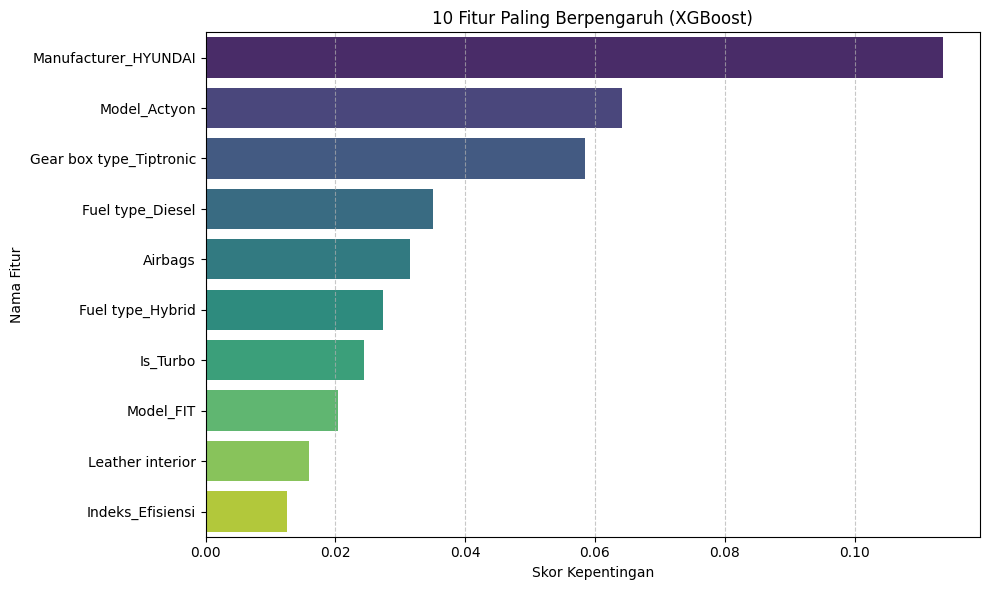

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Import numpy for np.sqrt

# Ensure necessary modules are imported for previous cells if running this cell independently
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Ambil model XGBoost terbaik hasil GridSearch
xgb_terbaik = xgb_gridsearch.best_estimator_

# Ambil nilai kepentingan fitur
nilai_importance = xgb_terbaik.feature_importances_
# Use the 'fitur' variable which holds the feature data
nama_fitur = fitur.columns

# Buat Series untuk mempermudah plotting
peringkat_fitur = pd.Series(nilai_importance, index=nama_fitur).sort_values(ascending=False)

# Visualisasi 10 fitur paling berpengaruh
plt.figure(figsize=(10, 6))
sns.barplot(x=peringkat_fitur.head(10), y=peringkat_fitur.head(10).index, palette="viridis")
plt.title("10 Fitur Paling Berpengaruh (XGBoost)")
plt.xlabel("Skor Kepentingan")
plt.ylabel("Nama Fitur")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pada tahap ini, dilakukan visualisasi untuk menampilkan **feature importance** dari model XGBoost terbaik yang dihasilkan melalui GridSearch.

### **Mengapa Visualisasi Ini Penting?**

Visualisasi ini berguna untuk mengidentifikasi fitur-fitur yang memiliki pengaruh terbesar dalam menentukan prediksi harga mobil (**log(Price)**). Dengan memahami fitur mana yang paling signifikan, kita dapat:

1. **Mendapatkan Insight dari Data**
   Misalnya, jika fitur **Gear box type\_Tiptronic** memiliki kontribusi besar terhadap prediksi harga, hal ini memberikan wawasan tentang faktor-faktor penting yang memengaruhi nilai mobil.

2. **Mendukung Keputusan Bisnis**
   Informasi ini dapat digunakan untuk fokus pada fitur-fitur utama yang memengaruhi harga, misalnya menonjolkan spesifikasi tertentu dalam pemasaran atau strategi penetapan harga.

3. **Menyederhanakan Model**
   Dengan mempertahankan hanya fitur-fitur yang paling penting (proses feature selection), model dapat dibuat lebih sederhana, yang mengurangi kompleksitas sekaligus meningkatkan efisiensi dalam proses prediksi.

4. **Meningkatkan Interpretabilitas**
   Visualisasi ini membantu menjelaskan hasil model kepada para pemangku kepentingan dengan cara yang lebih jelas dan mudah dipahami, sehingga meningkatkan kepercayaan terhadap hasil analisis.

Dengan pendekatan ini, analisis data tidak hanya berfokus pada akurasi prediksi, tetapi juga pada interpretasi dan nilai praktis dari fitur-fitur yang digunakan.


### **Kesimpulan:**

* Model regresi yang telah dikembangkan, terutama **Random Forest Regressor**, mampu memprediksi harga mobil bekas dengan tingkat akurasi yang cukup baik.

* Beberapa faktor utama, seperti **tahun produksi**, **kilometer yang telah ditempuh**, dan **jenis bahan bakar**, memiliki dampak signifikan terhadap nilai kendaraan.

* Proses **data preprocessing**, meliputi pembersihan data, encoding, serta feature engineering, memainkan peran penting dalam meningkatkan performa model.


### **Rekomendasi:**

* Dataset dapat ditingkatkan dengan menambahkan fitur-fitur baru, seperti **lokasi kendaraan**, **kondisi fisik mobil**, atau **riwayat perawatan**, untuk memperbaiki akurasi prediksi harga.

* Sistem prediksi ini bisa diimplementasikan pada **platform jual beli mobil online** untuk memberikan estimasi harga secara otomatis kepada pengguna.

* Penting untuk melakukan **evaluasi rutin** dan **melatih ulang model** secara berkala, sehingga model tetap mampu mengikuti perubahan tren pasar.

* Disarankan untuk mengeksplorasi teknik **ensemble** atau **boosting** lainnya, seperti **XGBoost** atau **LightGBM**, untuk mencari solusi yang lebih optimal.
